### Extent of the Market
J M Applegate  
##### CAS543 Complexity Economics
This notebook provides demonstrates how we can mathematically represent the returns to the division of labour and see how the extend of the market can limit the degree of the division.  
This first block of code plots various division of labour scenarios.

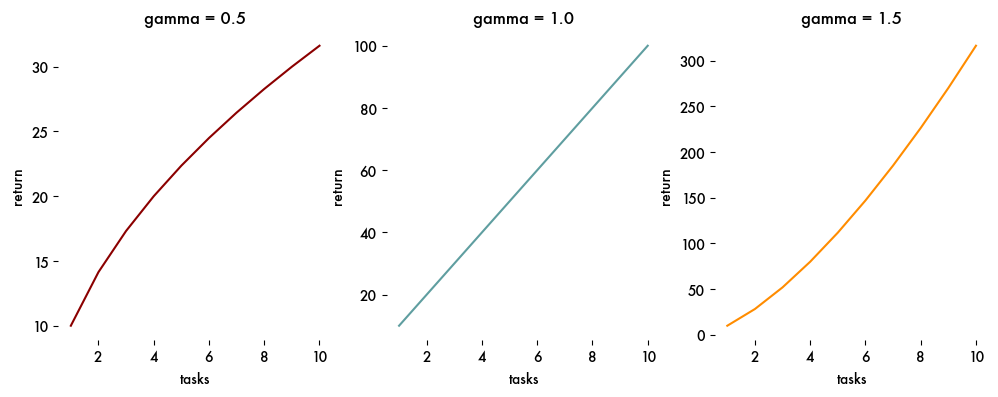

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font',**{'family':'sans-serif','sans-serif':['Futura']})

gamma = np.array((.5, 1, 1.5))
x = np.array(range(1, 11))
s = 10

fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(12, 4))

# plot the three gamma values
ax[0].plot(x, s*x ** gamma[0], color='darkred')
ax[0].set_title('gamma = %1.1f' % gamma[0])
ax[0].set_xlabel('tasks')
ax[0].set_ylabel('return')

ax[1].plot(x, s*x ** gamma[1], color='cadetblue')
ax[1].set_title('gamma = %1.1f' % gamma[1])
ax[1].set_xlabel('tasks')
ax[1].set_ylabel('return')

ax[2].plot(x, s*x ** gamma[2], color='darkorange')
ax[2].set_title('gamma = %1.1f' % gamma[2])
ax[2].set_xlabel('tasks')
ax[2].set_ylabel('return')

sns.despine(left = True, bottom = True)

plt.show()

plt.close()

These three plots describe, from left to right, decreasing returns, constant returns and increasing returns.  
Anything over a linear return provides an economic surplus.  
Innovations such as task specific tooling can increase the value of $\gamma$. 

From the lecture seamstress examples, 1 person makes 10 dresses in time $t$, and 2 people make 30 dresses in time $t$.  
The return to division formula is
$$r = ax^{\gamma}$$ where $x$ is the number of tasks, maybe employees as well.  
Solving $a$ and $\gamma$ for $(1, 10)$ and $(2, 30)$, we find $a = 10$ and $\gamma = \ln(3)/\ln(2) = 1.59$.  

Considering increasing returns from our seamstress example, this next code set shows how the number of tasks depends on the demand.  
Note that although all these representations of DoL returns are continuous, the number of tasks is discrete.

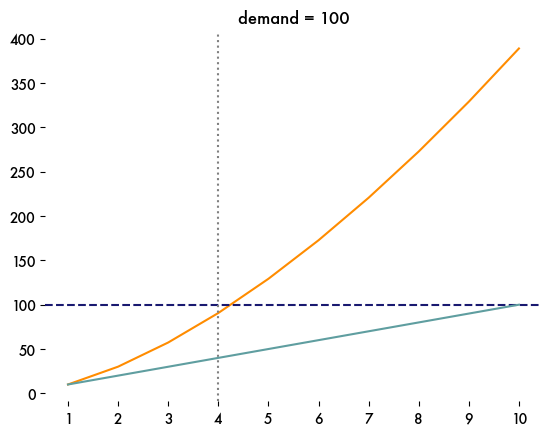

In [5]:
from math import log as ln
from math import exp
from math import floor

demand = 100
a = 10
s = 10
gamma = 1.59
tasks = floor(exp(ln(demand / s) / 1.59))

x = np.arange(1, 11)
fig = plt.plot(x, a * x ** gamma, color='darkorange')
plt.axhline(y = demand, c = 'midnightblue', linestyle = 'dashed')
plt.axvline(x = tasks, c = 'grey', linestyle='dotted')
plt.xticks(x)
plt.plot(x, a*x, c = 'cadetblue')
plt.title('demand = %1i' % demand)
sns.despine(left = True, bottom = True)

Here we assume the demand for dresses is 100, represented by the dotted horizontal line.   
Thus the number of task needed to support this level of production is 4.  
Any more division would result in overproduction.  
The blue line represents each seamstress workiing alone.  
Assuming each task is performed by a different worker, here we calculate the surplus production   
at the market clearing quantity compared to each seamstress works alone.

In [7]:
surplus = a * tasks ** gamma - a * tasks
print('Surplus production due to the division of labour:', floor(surplus))

Surplus production due to the division of labour: 50


Now say the market for dresses increases from 100 to 200.

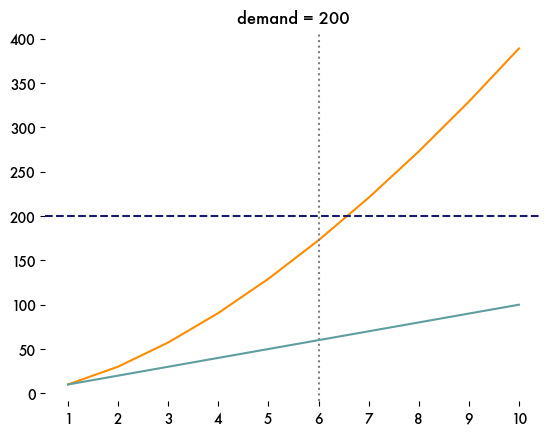

In [9]:
demand = 200
tasks = floor(exp(ln(demand / s) / 1.59))
x = np.arange(1, 11)
fig = plt.plot(x, a * x ** gamma, color='darkorange')
plt.axhline(y = demand, c = 'midnightblue', linestyle = 'dashed')
plt.axvline(x = tasks, c = 'grey', linestyle='dotted')
plt.plot(x, s*x, c = 'cadetblue')
plt.xticks(x)
plt.title('demand = %1i' % demand)
sns.despine(left = True, bottom = True)

Now the suitable number of tasks isk 6 instead of 4.  
The surplus can again be calculated.

In [10]:
surplus = a * tasks ** gamma - a * tasks
print('Surplus production due to the division of labour:', floor(surplus))

Surplus production due to the division of labour: 112


Thus we not only see the tasks increase with the market, but also the surplus increases with the market.  
When producers are seeking this surplus (profit) they have an incentive to increase the market.  

It would be unusual for a set of tasks to be continually divideable with superlinear returns.  
Here we look at a more realistic scenario, where at $x_c$ the value of $\gamma$ changes from increasings returns to decreasing returns.  
In this example, $x_c = 8$ and first $\gamma = 1.2$ then $\gamma = .8$.

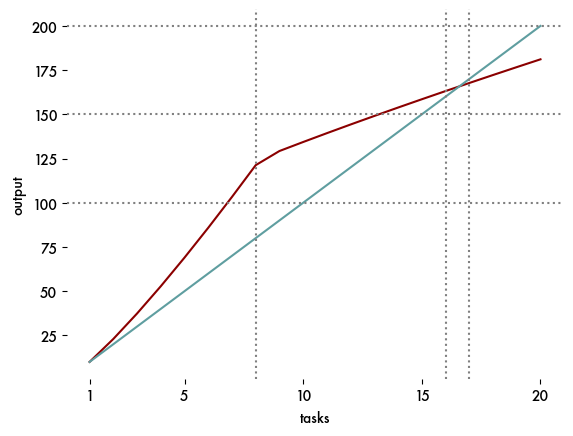

In [12]:
def output(x, s, x_c):
    gamma1 = 1.2
    gamma2 = .8
    if x <= x_c: 
        y = s*x**(gamma1)
    else:
        y = s * x ** gamma2 + (s * x_c ** gamma1 - s * (x_c + 1) ** gamma2 + x_c)
    return y

s = 10
x_c = 8
y = []
x = np.array(range(1, 21))
for n in x:
    y.append(output(n, s, x_c))
             
fig = plt.plot(x, y, color = 'darkred')
plt.xticks(np.floor(np.linspace(1, 20, 5)))
plt.xlabel('tasks')
plt.ylabel('output')
plt.plot(x, s * x, c = 'cadetblue')
plt.axvline(x = 16, c = 'grey', linestyle = 'dotted')
plt.axvline(x = 17, c = 'grey', linestyle = 'dotted')
plt.axvline(x = x_c, c = 'grey', linestyle = 'dotted')
plt.axhline(y = 100, c = 'grey', linestyle = 'dotted')
plt.axhline(y = 150, c = 'grey', linestyle = 'dotted')
plt.axhline(y = 200, c = 'grey', linestyle = 'dotted')
sns.despine(left = True, bottom = True)

Assume again that each task corresponds with an worker.  
The red line demonstrates the output according to tasks for our division of labour scenario,  
and the blue line represents each seamstress working by herself.  
The dotted lines represent various task and output values of interest.